In [ ]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam (2).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("/content/spam.csv",encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()


,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


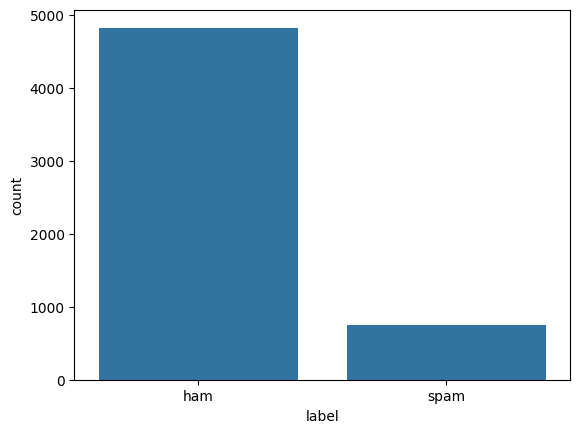

In [ ]:
sns.countplot(x=df['label'])
plt.show()

In [ ]:
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)


15


In [ ]:
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)


15585


In [ ]:
from sklearn.model_selection import train_test_split
X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
	new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)


MultinomialNB()

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
def fit_model(model, epochs, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return history
def evaluate_model(model, X, y):
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
    model_results_dict = {'accuracy': accuracy,'precision': precision,'recall': recall,'f1-score': f1}
    return model_results_dict
compile_model(model_1)
compile_model(model_2)
compile_model(model_3)
history_1 = fit_model(model_1, epochs=5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
history_2 = fit_model(model_2, epochs=5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
history_3 = fit_model(model_3, epochs=5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
results_1 = evaluate_model(model_1, X_test, y_test)
results_2 = evaluate_model(model_2, X_test, y_test)
results_3 = evaluate_model(model_3, X_test, y_test)
print("Model 1 Results:", results_1)
print("Model 2 Results:", results_2)
print("Model 3 Results:", results_3)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9812 - val_loss: 0.0858
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9803 - val_loss: 0.1036
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9998 - loss: 8.4655e-04 - val_accuracy: 0.9794 - val_loss: 0.1123
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9988 - loss: 0.0017 - val_accuracy: 0.9794 - val_loss: 0.1107
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 1.0000 - loss: 2.7959e-04 - val_accuracy: 0.9785 - val_loss: 0.1051
Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - accuracy: 1.0000 - loss: 2.5945e-06 - val_accuracy: 0.9830 - val_loss: 0.2393
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 1.0000 - loss: 7.0993e-08 - val_accuracy: 0.9830 - val_loss: 0.2550
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 1.0000 - loss: 2.781